In [1]:
import os
import glob
import pandas as pd  #need fastparquet also
import numpy as np

In [2]:
#download datasets according to hugging face repository
#git clone https://huggingface.co/datasets/nvidia/Nemotron-Personas-Japan


basedir = "./data"
parquets = glob.glob("*.parquet",root_dir=basedir)
print(parquets)

['train-00000-of-00008.parquet', 'train-00001-of-00008.parquet', 'train-00002-of-00008.parquet', 'train-00003-of-00008.parquet', 'train-00004-of-00008.parquet', 'train-00005-of-00008.parquet', 'train-00006-of-00008.parquet', 'train-00007-of-00008.parquet']


In [3]:
for parquet in parquets:
    filepath = os.path.join(basedir,parquet)
    df = pd.read_parquet(filepath)
    print(df)

                                    uuid  \
0       09ae83ddc11745f6b995113fe7ed4a77   
1       483cea9955d14202b78d425337f85062   
2       8b4be8cb58404c95ad644c1be698fb59   
3       82fe04d0b48e48a4ba12e28082cb306a   
4       0551fbb4fa354cdcba2e4c3a84aabea7   
...                                  ...   
124995  6f4f9474a0394bb184010a23673ad266   
124996  ac1846285c9647508f139df6935751dd   
124997  9eb8d725b9504605b8b2ac46d428939b   
124998  8e20aacf5dde45a29666849dce87290a   
124999  a08f6abba42d42c99f56ae423cf315c5   

                                     professional_persona  \
0       野本 花代子は、介護サービスの品質向上を推進する事業リーダーとして、構造化されたプロセス設計...   
1       杉浦 泰章は、郵便局の中堅として顧客窓口の対話と配達管理を紙ベースで確実に処理し、地域住民と...   
2       浅野 哲大は製造現場の安全基準と地域の礼儀を融合させ、経験と柔軟な計画志向で若手指導者として...   
3       岡田 咲弥は、季節ごとの作業計画とデータ駆動の品質記録を軸に、有機野菜ブランドの構築と農業協...   
4       駒村 嘉人は31歳の郵便局中堅管理職候補で、毎朝の配達経路最適化をルーティン化し、チームのス...   
...                                                   ...   
124995  井上 唄子は、産後ケアのデジタル化と地域助産リーダー育成をビジネスプラン

In [4]:
import cohere
#set API KEY to environment variables
#setx COHERE_API_KEY "...." ref. https://note.com/komzweb/n/n3392c290d7b8

co = cohere.ClientV2(api_key=os.environ["COHERE_API_KEY"])  

###
#according to COHERE API documents
#text_inputs = [
#    {"content": [
#        {"type": "text", "text": text} for text in df.iloc[0:3,1]
#    ]
#    },
#]
#
#co.embed(inputs=text_inputs...)
#not work as intended (whole of text_inputs was used as input...)
###

text_init = 0
text_num = 96

text_inputs = [text for text in df.iloc[text_init:text_init+text_num,1]]  #part of professional_persona column of last parquet

print(text_inputs)

response = co.embed(
    texts=text_inputs,
    model="embed-v4.0",
    input_type="classification",  #need to try other modes also for comparison
    embedding_types=["float"]
)


['清水 初菜は大手小売チェーンの地域統括マネージャー候補で、POSデータ分析とSNS連携を駆使したオムニチャネル戦略を設計し、コスパ意識と柔軟な計画管理で売上向上と業務効率化を牽引しようとしている。彼らはデータドリブンな意思決定とクリエイティブなビジュアルマーチャンダイジングを両立させている。', '花田 真那斗は、退職後の地域イベント企画と若手 clergy へのメンターシップに情熱を注ぎ、開放性と協調性で新しいイベント形式を試しつつ、柔軟な計画で外向的に参加者と交流し、誠実性は程よく保ちつつ神経症傾向の影響で臆病な場面では慎重に調整するビジネスパーソンである。', '北田 律樹は、化学工業のプロセス設計と安全管理に長年従事し、文書作成と研修の実績を活かして、退職後は地域の若手に実務知識と品質保証の手法を伝えることに情熱を注いでいる。彼らは、実用的な改善案と伝統的な手順の両方を評価し、柔軟な計画立案とチームの調和を重視する姿勢で、地域産業の持続的発展に貢献しようとしている。', '鈴木 方子はシニアトレーナーとして介護現場の品質向上プロジェクトを主導し、開放的なアイデア探索（高い開放性）と細部への厳格な注意（高い誠実性）を組み合わせて、若手スタッフへの実践的研修と対面式リーダーシップを展開し、組織内の信頼性と持続可能性を高めることに注力する。', '天野 栞太は、静岡の中部で培った省エネ意識と機械部品の組立経験を活かし、退職後は地域製造業の品質管理ノウハウを若手に伝授し、持続可能なライン改良プロジェクトを主導するビジネスリーダーである。', '片岡 朋恵は、先輩や上司への敬意と地域への配慮を自然に体得した背景を活かし、作業手順の標準化と在庫システムの最適化に注力し、若手整備士の育成プログラムを企画・実行することで、整備現場の効率化プロジェクトのリーダーシップを取るビジネスパーソンである。', '今中 信江は19歳の介護現場リーダー志望者で、地域の祭りや伝統工芸への参加を通じて培った協調性と柔軟な計画姿勢を、デジタル記録管理やチーム指示の吸収という実務スキルと組み合わせて、先輩の経験から学びつつ自治体資源を活かした福祉プログラム設計というビジネスビジョンを具体化している。', '近正 玲美子は、大阪の診療所で患者予約と電子カルテの効率化に日々取り組み、チームのスケ

In [5]:
#check if embedding number = text number
print(len(response.embeddings.float))
print(text_num)
print(response.embeddings.float)


96
96
[[0.03898958, -0.031088611, 0.02387468, -0.0021577384, -0.013654942, -0.0073427516, 0.013998462, 0.0051098685, 0.014256103, 0.039848384, 0.01219498, 0.11404882, -0.02559228, -0.00036767437, 0.012967901, 0.03143213, -0.0154584255, 0.016059585, -0.005668089, -0.0046160575, 0.003005805, 0.040878948, 0.05633737, -0.03194741, -0.008974475, 0.01193734, 0.040878948, 0.04465767, 0.027825164, 0.009446815, -0.008072733, 0.004143717, -0.00605455, -0.0152007835, 0.008974475, -0.008845654, -0.013654942, -0.016317226, -0.029886287, 0.03057333, 0.03074509, -0.027825164, -0.03211917, 0.014685503, 0.021985315, -0.03211917, -0.009618576, 0.017863069, -0.013569062, -0.026107563, -0.008416254, 0.0011110744, -0.03211917, -0.018206589, -0.04259655, 0.027309883, 0.030229807, 0.0055392687, -0.0028555144, -0.022500595, -0.05633737, -0.009403875, -0.053932726, -0.014771383, -0.010348557, -0.01812071, 0.01202322, 0.036756698, 0.009275055, -0.02456172, 0.008974475, 0.057711452, 0.016231345, -0.0064839507, 0

In [6]:
response.texts[0]

'清水 初菜は大手小売チェーンの地域統括マネージャー候補で、POSデータ分析とSNS連携を駆使したオムニチャネル戦略を設計し、コスパ意識と柔軟な計画管理で売上向上と業務効率化を牽引しようとしている。彼らはデータドリブンな意思決定とクリエイティブなビジュアルマーチャンダイジングを両立させている。'

In [7]:
#get texts for labeling. Truncated to 30 letters
documents = [response.texts[i][:30] for i in range(len(response.texts))]
print(documents)

['清水 初菜は大手小売チェーンの地域統括マネージャー候補で、P', '花田 真那斗は、退職後の地域イベント企画と若手 clergy', '北田 律樹は、化学工業のプロセス設計と安全管理に長年従事し、', '鈴木 方子はシニアトレーナーとして介護現場の品質向上プロジェ', '天野 栞太は、静岡の中部で培った省エネ意識と機械部品の組立経', '片岡 朋恵は、先輩や上司への敬意と地域への配慮を自然に体得し', '今中 信江は19歳の介護現場リーダー志望者で、地域の祭りや伝', '近正 玲美子は、大阪の診療所で患者予約と電子カルテの効率化に', '植西 裕登は、デジタルツールと地元の従来工芸を融合させたオン', '島 四男は、化学プラントで培った安全管理ノウハウを地域の中学', '生田島 里緒奈は、地域医療拡大を目指す起業家的マインドを持ち', '大西 由伊子は、熟練した織物品質管理の知見を活かし、地域文化', '奥野 秀馬は、現場で培った安全管理と部下育成のノウハウをデジ', '手塚 千花子は退職後に地域安全パートナーとして防災講座や高齢', '玉井 恋乃は、里山の子どもたちへの学習支援をボランティア事業', '武藤 翔一は、POSシステムとPython自動化を駆使して販', '寺岡 雄樹は、機械保全と品質管理を中心に、コスト削減と工程最', '灘 夢月（18歳）は、化学工業のプロセス管理と品質保証に特化', '坂本 重良は、持続可能な農業とアグリツーリズムの融合をビジネ', '竹田 勝規（45）は、顧客対応と営業支援に長けたチームリーダ', '金子 裕崇は中部拠点の警備管理部長候補として、現場巡回計画と', '岩田 道代は小売業の在庫管理と顧客対応に長け、予算意識とチー', '古内 遼音は、プラスチック成形の工程設計と品質管理で培った体', '三上 夢野は、診療所の運営効率向上をビジネス目標に据え、組織', '藤井 創一郎は品質管理の実務経験を活かし、設計アイデアと現場', '富田 美樹枝は電気機械部品の工程設計・改善で培った構造重視の', '西島 絃羽は、清掃業務の高度な技術と在庫管理の正確さを武器に', '小野田 けさ江は、食品衛生管理の資格を活かし在庫と工程の最適', '児玉 奈奈は、機械部品ラインのベテランとして安全・品質管理の', '高藤 正善は、施工管理と

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font='Yu Gothic')

[[1.         0.34142903 0.2650902  ... 0.29538474 0.39818522 0.34280795]
 [0.34142903 1.         0.42327772 ... 0.40781844 0.35322587 0.4769311 ]
 [0.2650902  0.42327772 1.         ... 0.40120351 0.33727529 0.44257629]
 ...
 [0.29538474 0.40781844 0.40120351 ... 1.         0.33536166 0.40204581]
 [0.39818522 0.35322587 0.33727529 ... 0.33536166 1.         0.37780979]
 [0.34280795 0.4769311  0.44257629 ... 0.40204581 0.37780979 1.        ]]


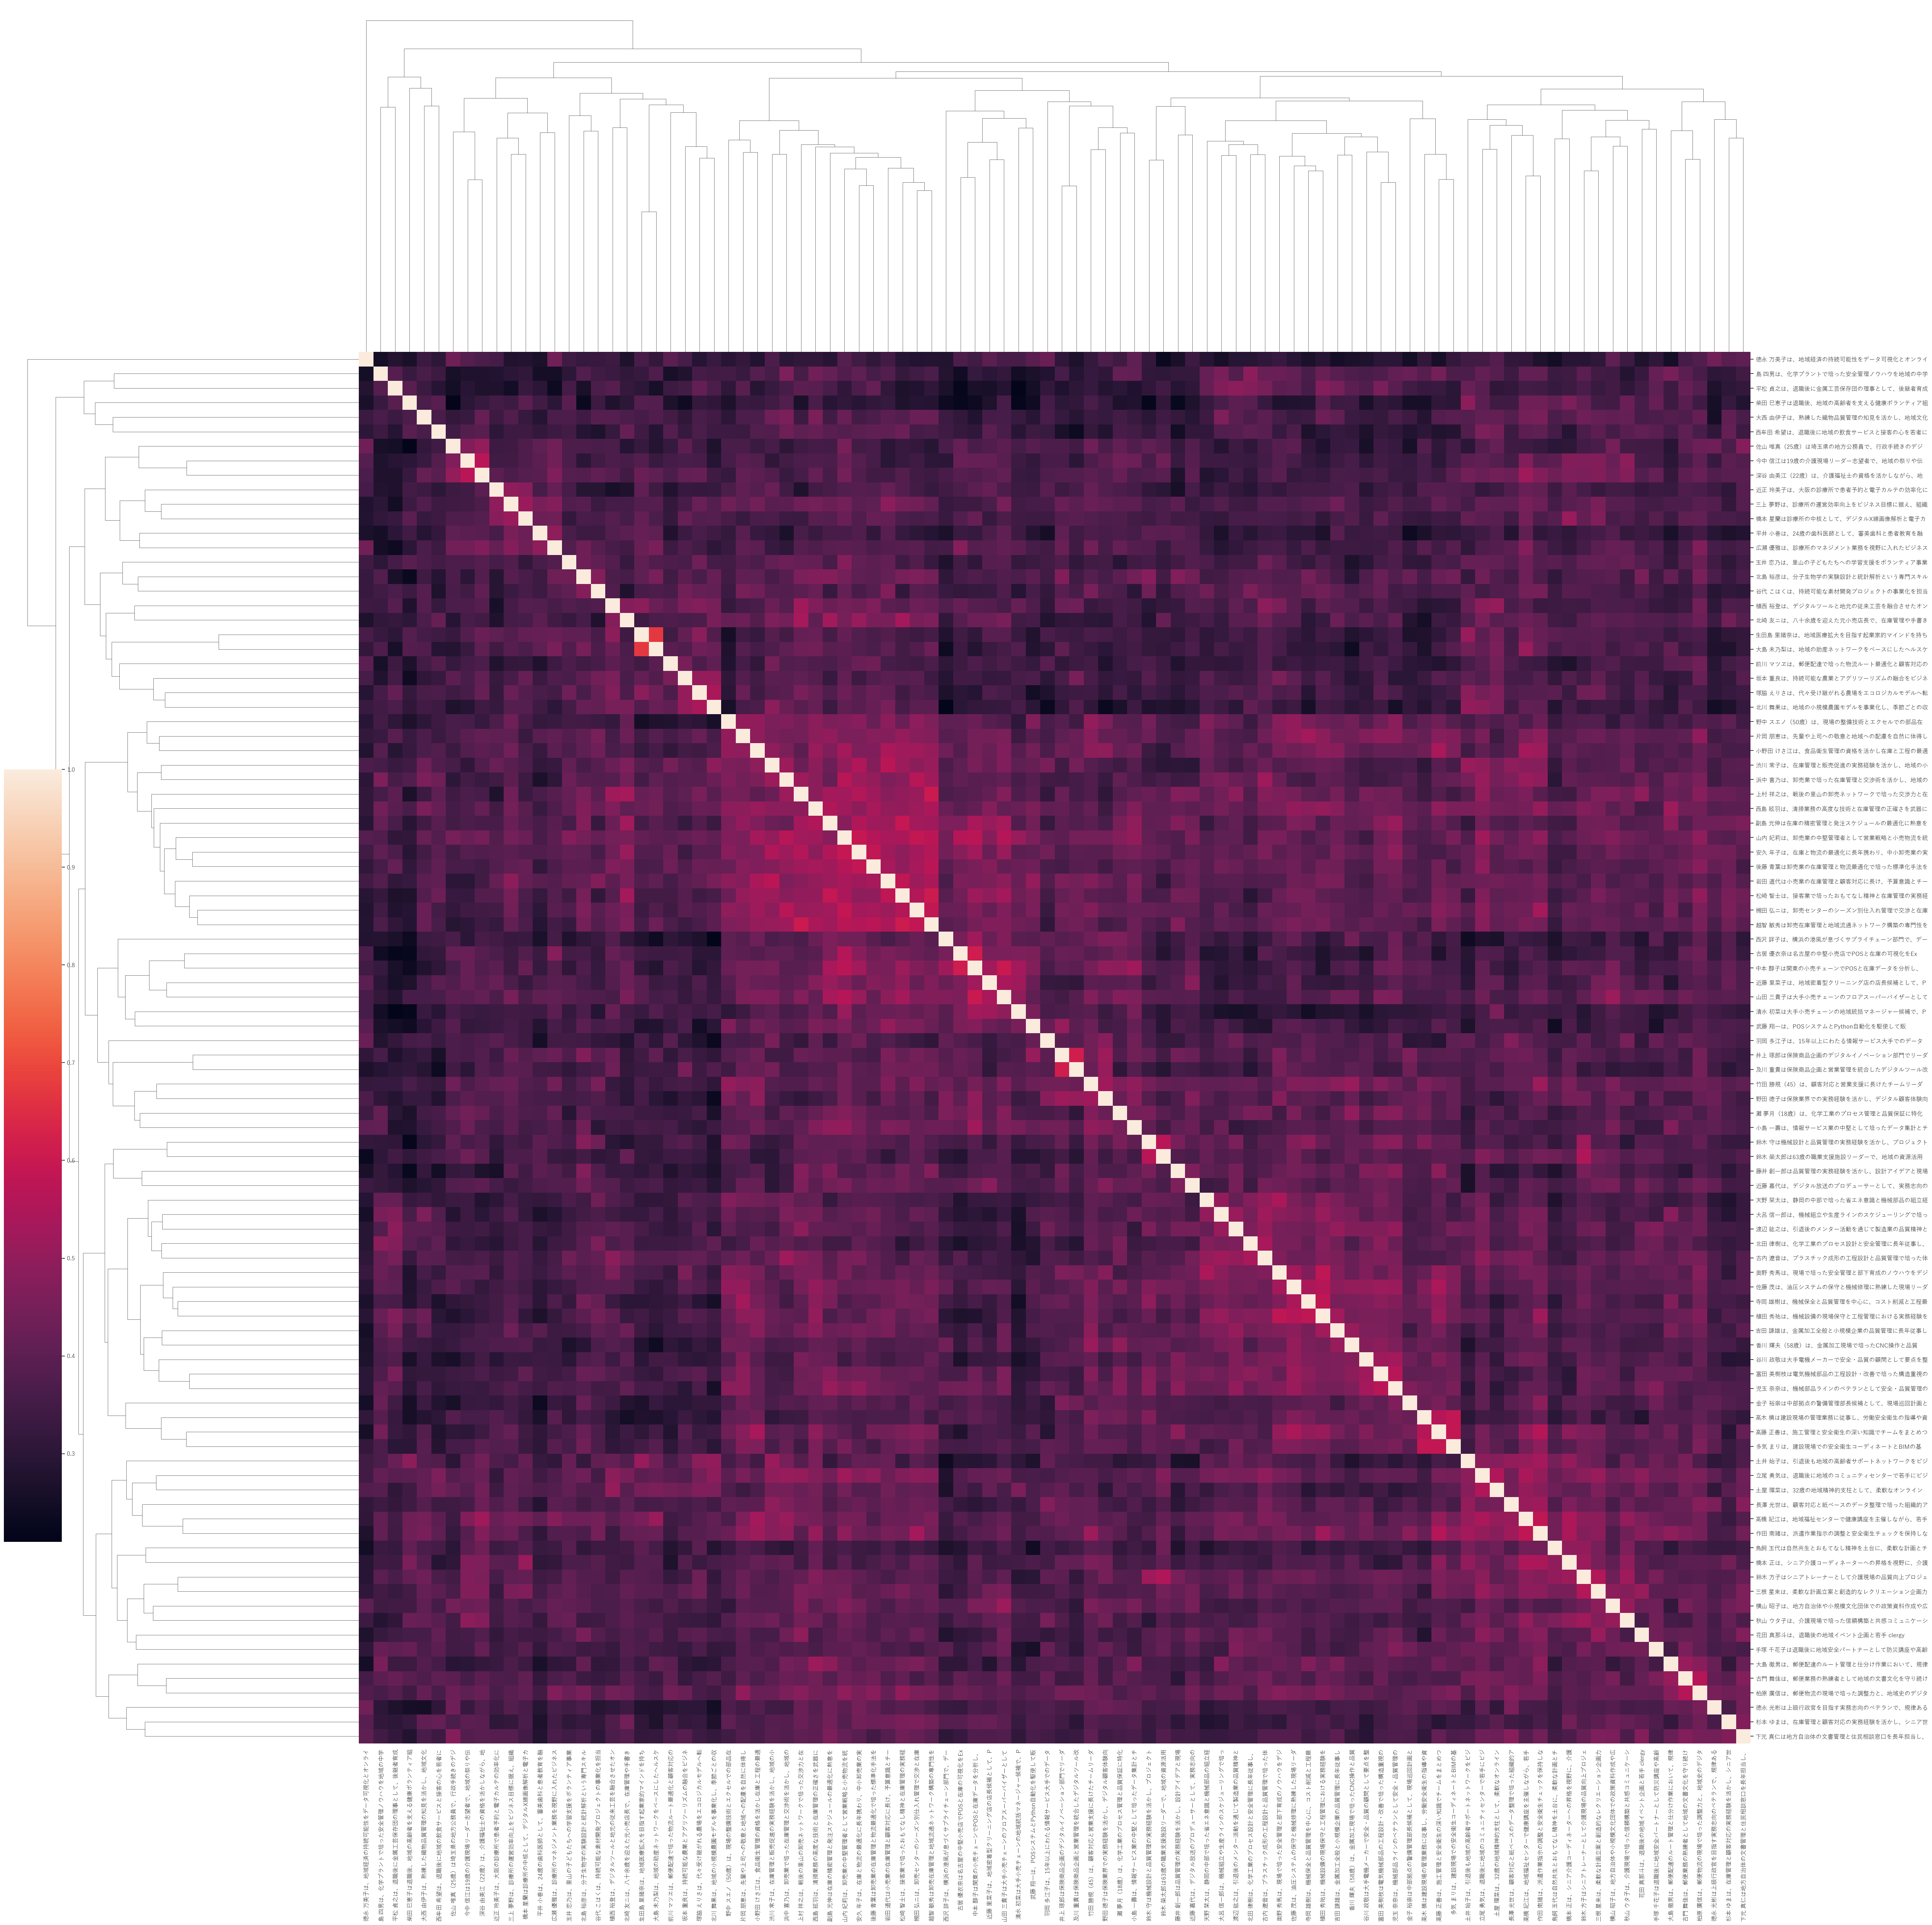

In [9]:
cosine_sim_matrix = cosine_similarity(response.embeddings.float)
print(cosine_sim_matrix)

sns.clustermap(
    pd.DataFrame(cosine_sim_matrix,columns=documents, index=documents),
    figsize=(50, 50),
    row_cluster=True,
    dendrogram_ratio=(.2, .2),
    cbar_pos=(0, .2, .03, .4)
)
plt.savefig("./heatmap.png")